In [1]:
import sys
sys.path.append('/usr/local/lib/wingpro10')
sys.path.append('/home/yeison/Development/PythonDev/DunderLab/python-chaski')
import wingdbstub

wingdbstub.Ensure()

In [2]:
import sys
import time
import asyncio
from datetime import datetime
from chaski.node import ChaskiNode
from itertools import product
import logging 
from names_generator import generate_name
import networkx as nx
import matplotlib.pyplot as plt
import random
from string import ascii_uppercase
# logging.basicConfig(level=logging.DEBUG)

In [3]:
host = '::1'  # IPV6
# host = '127.0.0.1'  # IPV4

nodes = []
for i in range(7):
    node = ChaskiNode(host, 65432+i, name=generate_name())
    asyncio.create_task(node.start_server())
    nodes.append(node)

await asyncio.sleep(1)

In [4]:
for i in range(len(nodes)-1):
    for j in range(len(nodes)-1):
        
        if i != j:
            await nodes[i].connect_to_peer(nodes[j], back_connect=False)


In [7]:
for node in nodes:
    print(await node.ping())

None
None
None
None
None
None
None


In [5]:
for node in nodes:
    print(node)

elastic_easley: 65432
eager_grothendieck: 65433
admiring_liskov: 65434
agitated_booth: 65435
nifty_bardeen: 65436
busy_meitner: 65437
elegant_clarke: 65438


In [8]:
for node in nodes:
    print(node.name, node.server_pairs)

elastic_easley [eager_grothendieck: 1.3159999999999998, admiring_liskov: 0.8664999999999999, agitated_booth: 0.47300000000000003, nifty_bardeen: 0.5905, busy_meitner: 0.5225]
eager_grothendieck [elastic_easley: 0.641, admiring_liskov: 0.6595000000000001, agitated_booth: 0.40499999999999997, nifty_bardeen: 0.4695, busy_meitner: 0.5675]
admiring_liskov [elastic_easley: 0.5185, eager_grothendieck: 0.4795, agitated_booth: 0.514, nifty_bardeen: 0.4725, busy_meitner: 0.3375]
agitated_booth [elastic_easley: 0.5105, eager_grothendieck: 0.4165, admiring_liskov: 0.32449999999999996, nifty_bardeen: 0.517, busy_meitner: 0.4145]
nifty_bardeen [elastic_easley: 0.319, eager_grothendieck: 0.49950000000000006, admiring_liskov: 0.4775, agitated_booth: 0.9165, busy_meitner: 0.46299999999999997]
busy_meitner [elastic_easley: 0.3365, eager_grothendieck: 0.6345, admiring_liskov: 0.4465, agitated_booth: 0.559, nifty_bardeen: 0.426]
elegant_clarke []


In [12]:
for node in nodes:
    print(node.name, node.server_pairs)

elastic_easley [eager_grothendieck: 1.3159999999999998, admiring_liskov: 0.8664999999999999, agitated_booth: 0.47300000000000003, nifty_bardeen: 0.5905, busy_meitner: 0.5225]
eager_grothendieck [elastic_easley: 0.641, admiring_liskov: 0.6595000000000001, agitated_booth: 0.40499999999999997, nifty_bardeen: 0.4695, busy_meitner: 0.5675]
admiring_liskov [elastic_easley: 0.5185, eager_grothendieck: 0.4795, agitated_booth: 0.514, nifty_bardeen: 0.4725, busy_meitner: 0.3375]
agitated_booth [elastic_easley: 0.5105, eager_grothendieck: 0.4165, admiring_liskov: 0.32449999999999996, nifty_bardeen: 0.517, busy_meitner: 0.4145]
nifty_bardeen [elastic_easley: 0.319, eager_grothendieck: 0.49950000000000006, admiring_liskov: 0.4775, agitated_booth: 0.9165, busy_meitner: 0.46299999999999997]
busy_meitner [elastic_easley: 0.3365, eager_grothendieck: 0.6345, admiring_liskov: 0.4465, agitated_booth: 0.559, nifty_bardeen: 0.426]
elegant_clarke []


In [9]:
G = nx.Graph()

nodes_ = []
for node in nodes:
    nodes_.append({'name': node.name, 'server_pairs': {v.name:round(v.latency, 2) for v in node.server_pairs}})

for node in nodes_:
    for neighbor, latency in node["server_pairs"].items():
        G.add_edge(node["name"], neighbor, weight=latency)

for edge in G.edges(data=True):
    print(edge)

('elastic_easley', 'eager_grothendieck', {'weight': 0.64})
('elastic_easley', 'admiring_liskov', {'weight': 0.52})
('elastic_easley', 'agitated_booth', {'weight': 0.51})
('elastic_easley', 'nifty_bardeen', {'weight': 0.32})
('elastic_easley', 'busy_meitner', {'weight': 0.34})
('eager_grothendieck', 'admiring_liskov', {'weight': 0.48})
('eager_grothendieck', 'agitated_booth', {'weight': 0.42})
('eager_grothendieck', 'nifty_bardeen', {'weight': 0.5})
('eager_grothendieck', 'busy_meitner', {'weight': 0.63})
('admiring_liskov', 'agitated_booth', {'weight': 0.32})
('admiring_liskov', 'nifty_bardeen', {'weight': 0.48})
('admiring_liskov', 'busy_meitner', {'weight': 0.45})
('agitated_booth', 'nifty_bardeen', {'weight': 0.92})
('agitated_booth', 'busy_meitner', {'weight': 0.56})
('nifty_bardeen', 'busy_meitner', {'weight': 0.43})


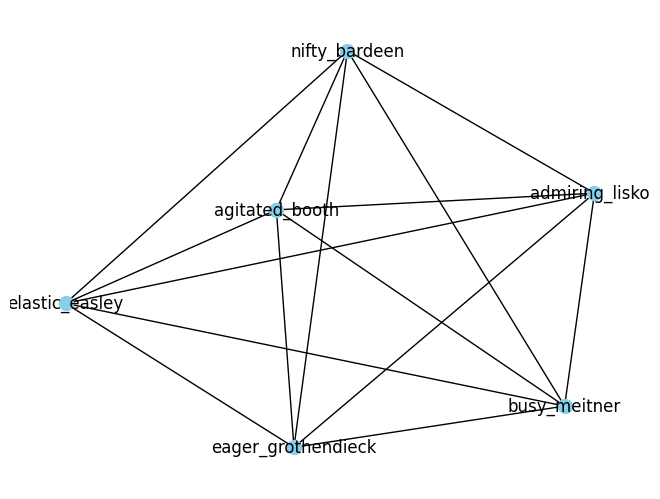

In [10]:
nx.draw(G, with_labels=True, node_color='skyblue', node_size=100)
plt.show()

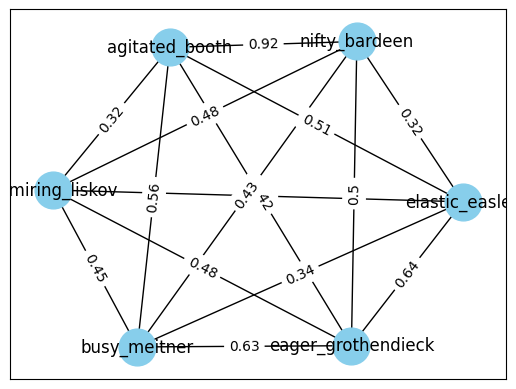

In [11]:
# Posicionar los nodos usando un layout
pos = nx.spring_layout(G)

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)

# Dibujar las aristas
nx.draw_networkx_edges(G, pos)

# Dibujar las etiquetas de los nodos
nx.draw_networkx_labels(G, pos)

# Dibujar las etiquetas de las aristas con los pesos
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Mostrar el gráfico
plt.show()